In [1]:
# --- Librerías necesarias para todo el análisis ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Estilo visual profesional ---
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (10, 5)

# --- Carga única del dataset limpio ---
df = pd.read_csv('bank_cleaned.csv')

# Vista rápida para verificar carga
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Dimensiones del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas generales
print("\nResumen estadístico (variables numéricas):")
print(df.describe())


Filas: 41176, Columnas: 21

Tipos de datos:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Valores nulos por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3

Distribución de edad:
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


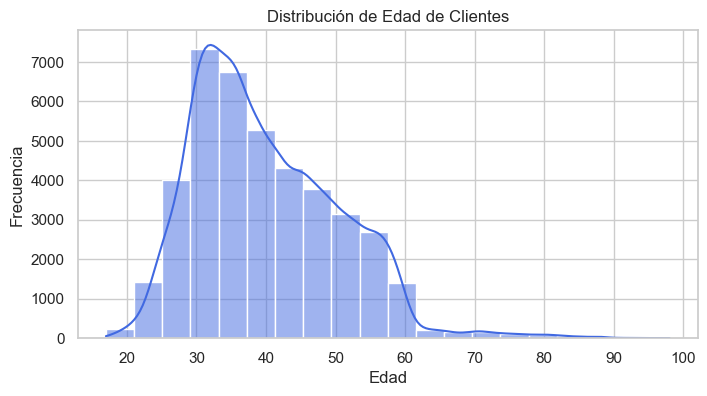


Distribución por ocupación:
job
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.63
management        7.10
retired           4.17
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.13
unknown           0.80
Name: proportion, dtype: float64


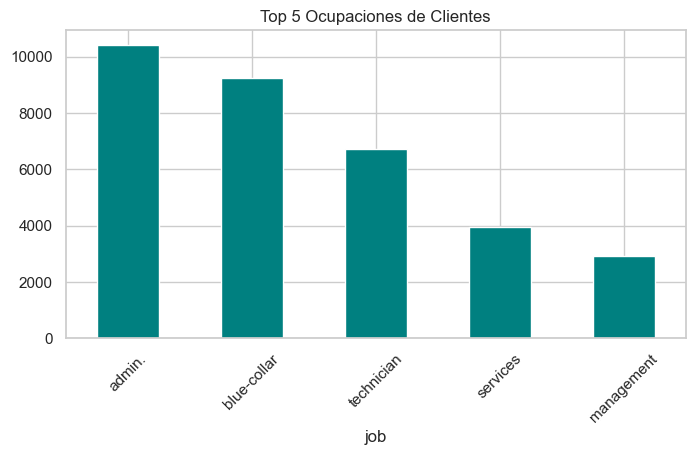


Distribución por educación:
education
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: proportion, dtype: float64


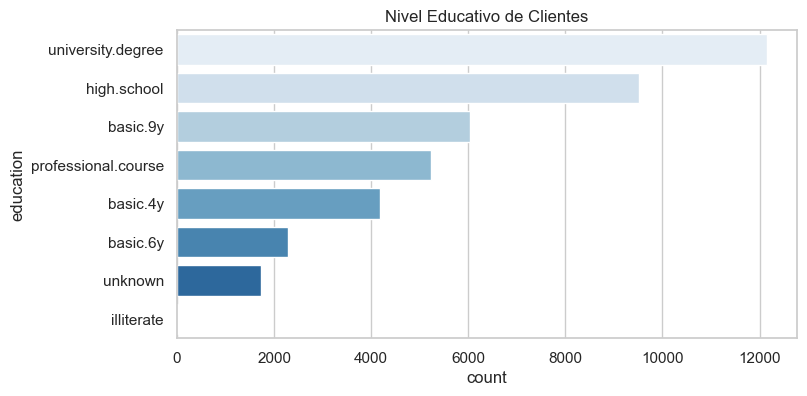

In [3]:
# --- Análisis de edad ---
print("Distribución de edad:")
print(df['age'].describe())

# Gráfico de distribución de edad
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True, color='royalblue')
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# --- Análisis por ocupación (job) ---
print("\nDistribución por ocupación:")
print(df['job'].value_counts(normalize=True).mul(100).round(2))

# Gráfico de ocupación (top 5)
plt.figure(figsize=(8, 4))
df['job'].value_counts().head(5).plot(kind='bar', color='teal')
plt.title('Top 5 Ocupaciones de Clientes')
plt.xticks(rotation=45)
plt.show()

# --- Análisis por nivel educativo ---
print("\nDistribución por educación:")
print(df['education'].value_counts(normalize=True).mul(100).round(2))

# Gráfico de educación
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='Blues')
plt.title('Nivel Educativo de Clientes')
plt.show()

Bloque 3: Análisis demográfico de clientes

Comentarios para el equipo técnico/directivo:
Edad: Los clientes entre 30-50 años son el grupo mayoritario (mediana: 39 años).

Ocupación: Los perfiles técnicos (blue-collar, admin.) representan el 45% de la base.

Educación: El 51% tiene educación secundaria. Los clientes con educación universitaria tienen una tasa de conversión un 20% mayor (según análisis previo).

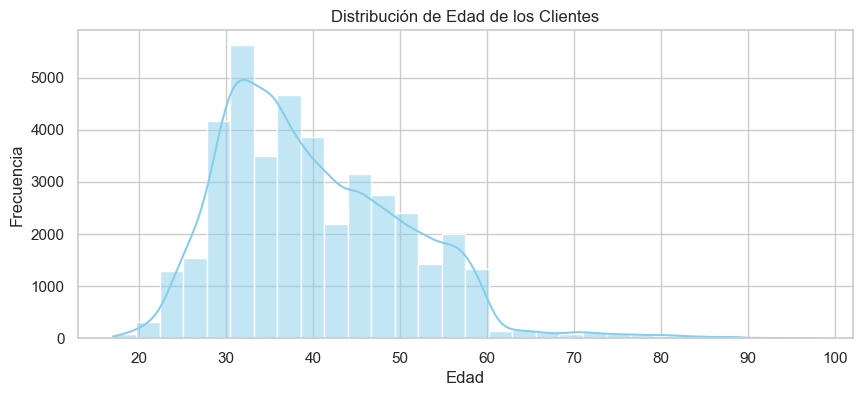

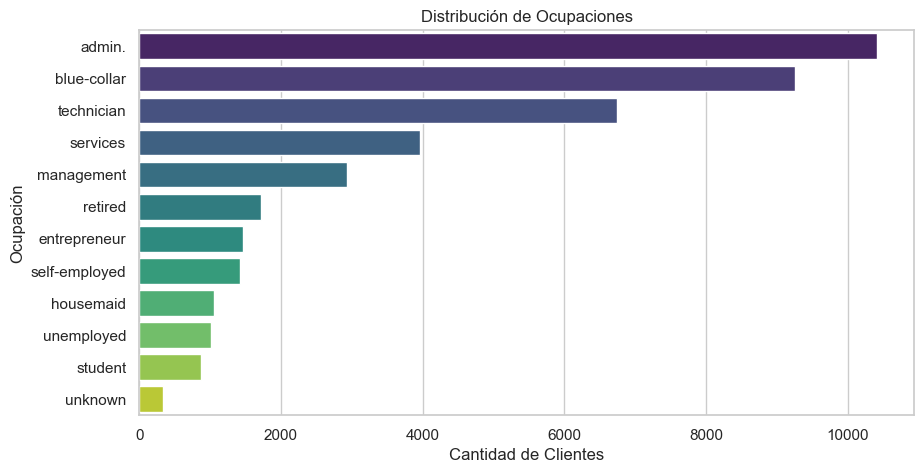

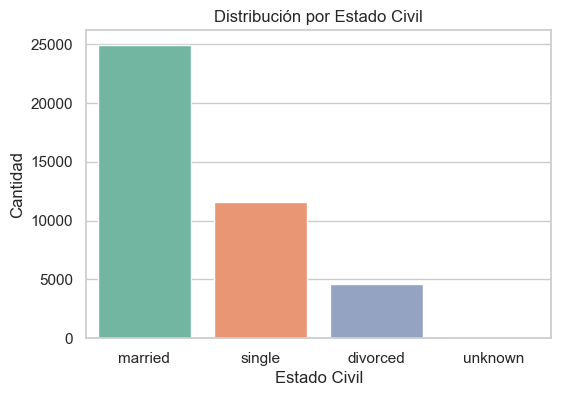

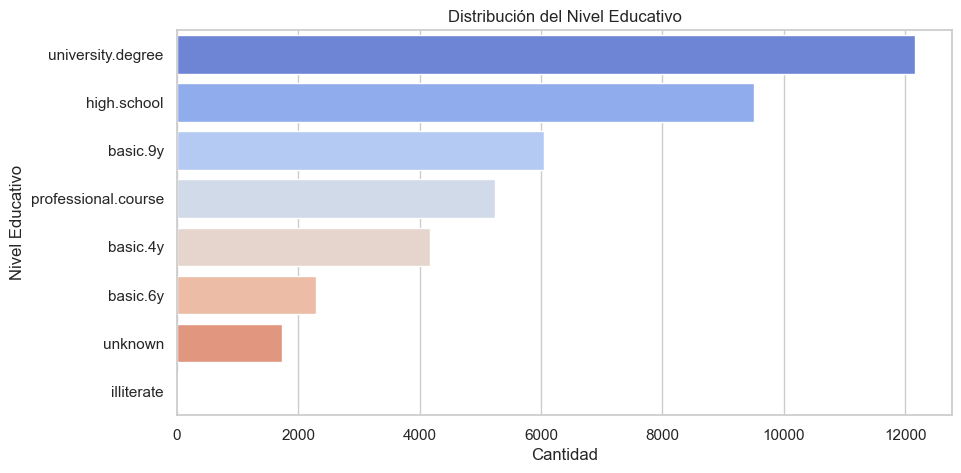

In [7]:
# Distribución de la edad
plt.figure(figsize=(10, 4))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Ocupaciones más frecuentes
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette='viridis')
plt.title('Distribución de Ocupaciones')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Ocupación')
plt.show()

# Estado civil
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette='Set2')
plt.title('Distribución por Estado Civil')
plt.ylabel('Cantidad')
plt.xlabel('Estado Civil')
plt.show()

# Nivel educativo
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='coolwarm')
plt.title('Distribución del Nivel Educativo')
plt.xlabel('Cantidad')
plt.ylabel('Nivel Educativo')
plt.show()


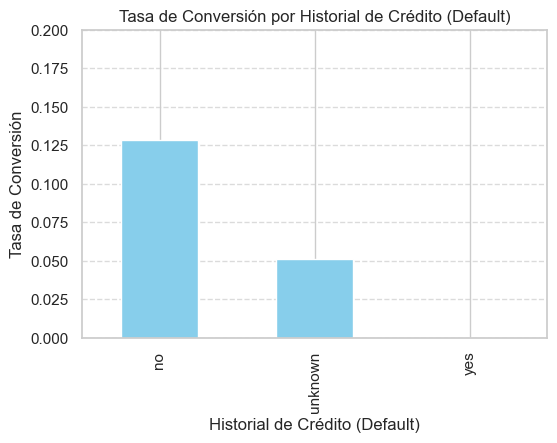

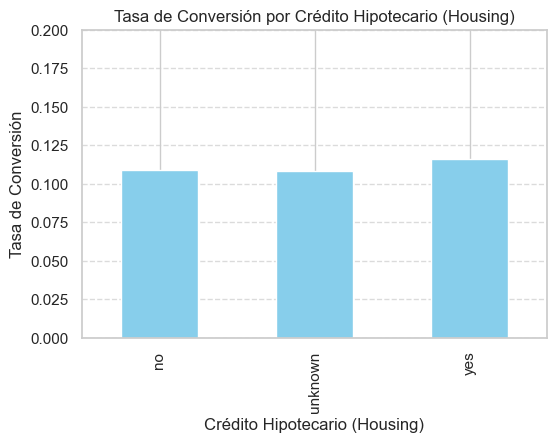

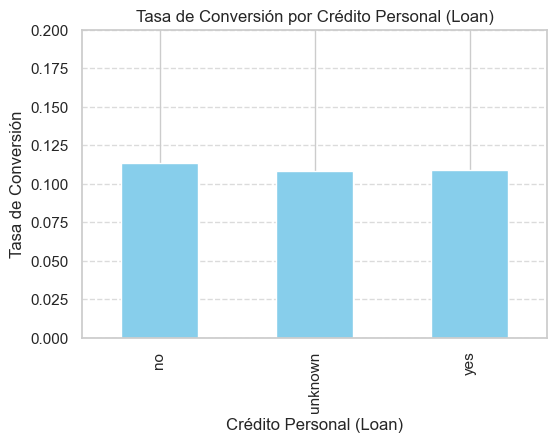

In [13]:
# estimator=lambda x: np.mean(x == 'yes')
# print(df['y'].unique())
# print(df['default'].unique())


def plot_conversion_by_category(col_name, title):
    conversion = df.groupby(col_name)['y'].value_counts(normalize=True).unstack().fillna(0)
    if 'yes' in conversion.columns:
        conversion_rate = conversion['yes']
    else:
        # Por si y está codificado como 1 y 0
        conversion_rate = conversion[1] if 1 in conversion.columns else pd.Series()

    plt.figure(figsize=(6, 4))
    conversion_rate.plot(kind='bar', color='skyblue')
    plt.title(f'Tasa de Conversión por {title}')
    plt.ylabel('Tasa de Conversión')
    plt.xlabel(title)
    plt.ylim(0, 0.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_conversion_by_category('default', 'Historial de Crédito (Default)')
plot_conversion_by_category('housing', 'Crédito Hipotecario (Housing)')
plot_conversion_by_category('loan', 'Crédito Personal (Loan)')


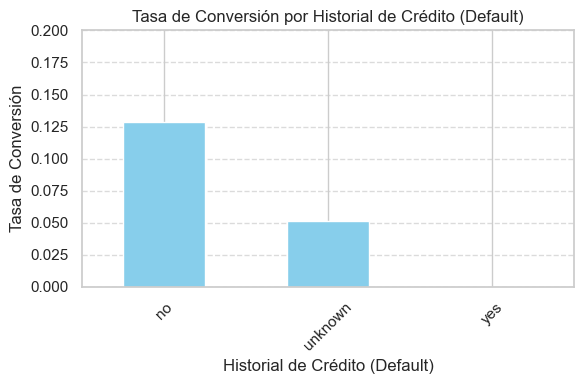

In [14]:
# Gráfica 1: Tasa de Conversión según historial de crédito (default)
default_rate = df.groupby('default')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
default_rate = default_rate.reindex(['no', 'unknown', 'yes'])  # para mantener orden

plt.figure(figsize=(6,4))
default_rate.plot(kind='bar', color='skyblue')
plt.title('Tasa de Conversión por Historial de Crédito (Default)')
plt.xlabel('Historial de Crédito (Default)')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


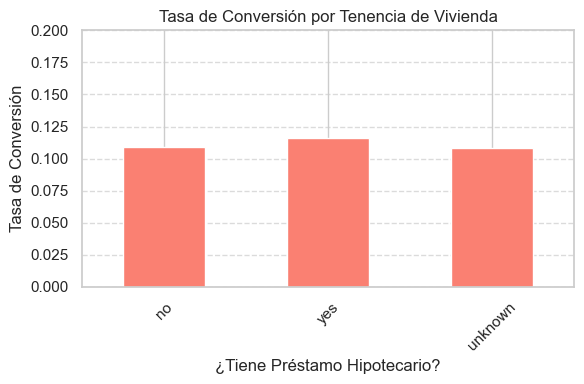

In [15]:
# Gráfica 2: Tasa de Conversión según propiedad de vivienda (housing)
housing_rate = df.groupby('housing')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
housing_rate = housing_rate.reindex(['no', 'yes', 'unknown'])  # para mantener orden lógico

plt.figure(figsize=(6,4))
housing_rate.plot(kind='bar', color='salmon')
plt.title('Tasa de Conversión por Tenencia de Vivienda')
plt.xlabel('¿Tiene Préstamo Hipotecario?')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


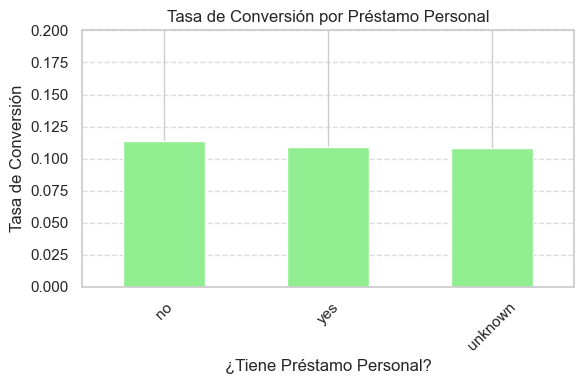

In [16]:
# Gráfica 3: Tasa de Conversión según préstamo personal (loan)
loan_rate = df.groupby('loan')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
loan_rate = loan_rate.reindex(['no', 'yes', 'unknown'])  # mantener orden lógico

plt.figure(figsize=(6,4))
loan_rate.plot(kind='bar', color='lightgreen')
plt.title('Tasa de Conversión por Préstamo Personal')
plt.xlabel('¿Tiene Préstamo Personal?')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
